# ¡Hola, Yair!  

Mi nombre es Carlos Ortiz, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders=pd.read_csv("/datasets/instacart_orders.csv",sep=";")
products=pd.read_csv("/datasets/products.csv",sep=";")
aisles=pd.read_csv("/datasets/aisles.csv",sep=";")
departments=pd.read_csv("/datasets/departments.csv",sep=";")
order_products=pd.read_csv("/datasets/order_products.csv",sep=";")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta importación de datos y de librerías.
</div>


In [3]:
# mostrar información del DataFrame
print(instacart_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [4]:
# mostrar información del DataFrame
print(products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [5]:
# mostrar información del DataFrame
print(aisles.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# mostrar información del DataFrame
print(departments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# mostrar información del DataFrame
print(order_products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones. aplique a cada uno de los dataframe .info para ver las columnas y el tipo de dato que contenian


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.Primero elimino los duplicados y despues los elementos ausentes

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(instacart_orders.duplicated().sum()) 
print(instacart_orders[instacart_orders.duplicated()])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
hay 15 duplicados y todos son hechos el miercoles a las 2:00 am

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders[(instacart_orders["order_dow"]==3) & (instacart_orders["order_hour_of_day"]==2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? verificamos todos los predidos que se hicieron el miercoles a las 2:00am

In [10]:
# Elimina los pedidos duplicados
instacart_orders.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum()) 
print(instacart_orders[instacart_orders.duplicated()])

0
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_orders[instacart_orders["order_id"].duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos. elimine todos los duplicados 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum()) 

0


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
print(products["product_id"].duplicated().sum())

0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"]=products["product_name"].str.upper()
print(products["product_name"].duplicated().sum())



1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
nombre_sin_nan=products["product_name"].dropna()
print(nombre_sin_nan[nombre_sin_nan.duplicated()])

2058                                     BIOTIN 1000 MCG
5455                    GREEN TEA WITH GINSENG AND HONEY
5558                              CREAM OF MUSHROOM SOUP
7558                           CINNAMON ROLLS WITH ICING
9037                              AMERICAN CHEESE SLICES
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 104, dtype: object


Describe brevemente tus hallazgos y lo que hiciste con ellos.
En total hay 104 nombres duplicados en la columna "product_name" en el data frame 

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments["department_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
no encontre duplicados en el dataframe departments

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles["aisle_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos. no encontre duplicados en aisles 

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products["order_id"].duplicated().sum())

print(order_products["product_id"].duplicated().sum())
print(order_products["add_to_cart_order"].duplicated().sum())
print(order_products["reordered"].duplicated().sum())


4094961
4499434
4544942
4545005


Describe brevemente tus hallazgos y lo que hiciste con ellos. en terminos generales no hay elementos duplicados en el dataframe de ordenes 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print((products.isna().sum()))

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.hay 1258 valores ausentes en la columna product_name

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

In [25]:
productos_aisle_100=products[products["aisle_id"]==100]
productos_aisle_100["product_name"].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos.
todos los nombres de productos en el pasillo 100 son ausentes

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# products[products["aisle_id"]==21]["product_name"].unique()
products[products["department_id"]==21]["product_name"].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos.    en el departamento con id 100 todos los nombres de los productos  son ausentes  

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
products_review=products[(products["department_id"]==21) & (products["aisle_id"]==100)]["product_name"]
print(products_review)

37       NaN
71       NaN
109      NaN
296      NaN
416      NaN
        ... 
49552    NaN
49574    NaN
49640    NaN
49663    NaN
49668    NaN
Name: product_name, Length: 1258, dtype: object


Describe brevemente cuáles son tus hallazgos. al parecer en los datos del pasillo con ID 100 y el departamento con ID 21 tienen valores nulos

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products[(products["department_id"]==21) & (products["aisle_id"]==100)]["product_name"].fillna("Unknown",inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Describe brevemente tus hallazgos y lo que hiciste con ellos. sustitui nan con el nombre unknow en todos los valores ausentes

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_orders[(instacart_orders["order_number"]>1)&(instacart_orders["days_since_prior_order"].isna())])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos. no existe algun valor ausente cuando la columna"order_number" que significa el numero de ordenes sea mayor que uno, osea que solo en el primer pedido existe valores ausentes en la columna "days_since_order" 

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products["add_to_cart_order"].min())
print(order_products["add_to_cart_order"].max())

1.0
64.0


Describe brevemente cuáles son tus hallazgos. en principio vemos que existe 836 valores ausentes en la fila "add_to_cart_order" que es el orden secuencial en el que se añadió cada artículo en el carrito. y los valores minimos y maximos son 1 y 64 respectivamente

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
nan_product_id=order_products[order_products["add_to_cart_order"].isna()]
print(nan_product_id)



         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
pedidos=nan_product_id.groupby("order_id")["product_id"].count().reset_index()

print(pedidos.min())

order_id      9310
product_id       1
dtype: int64


Describe brevemente cuáles son tus hallazgos. La order_id que solo tiene solo un numero de pedido es 9310

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"]=order_products["add_to_cart_order"].fillna(999)
order_products["add_to_cart_order"]=order_products["add_to_cart_order"].astype(int)


Describe brevemente tus hallazgos y lo que hiciste con ellos. Llene los valores ausentes con 999 y lo converti a entero

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
    
</div>


## Conclusiones

Escribe aquí tus conclusiones. En resumen primero encontre y elimine los datos ausentes en el dataframe de products rellenandolos con unknow, despues encontre valores ausentes en days_since_prior_order en la tabla de orders y luego reemplaze los valores ausentes de add_to_cart_order con 999


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` de la tabla `orders` sean sensibles (es decir, `'order_hour_of_day'` va de 0 a 23 y `'order_dow'` va de 0 a 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(instacart_orders["order_hour_of_day"].min())
print(instacart_orders["order_hour_of_day"].max())


0
23


In [37]:
print(instacart_orders["order_dow"].min())
print(instacart_orders["order_dow"].max())

0
6


Escribe aquí tus conclusiones. verifique que los valores esten dentro de los rangos 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

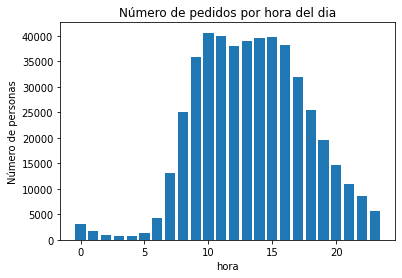

In [38]:

nuevo_df=instacart_orders[["user_id","order_hour_of_day"]]
conteo_por_hora = nuevo_df['order_hour_of_day'].value_counts().reset_index()
plt.bar(conteo_por_hora['index'], conteo_por_hora['order_hour_of_day'])
plt.xlabel('hora')
plt.ylabel('Número de personas')
plt.title('Número de pedidos por hora del dia')
plt.show()


Escribe aquí tus conclusiones.Se pued ver que desde las 9:00 horas hasta las 18:00 horas hay mas personas haciendo pedidos 

### [A3] ¿Qué día de la semana compran víveres las personas?

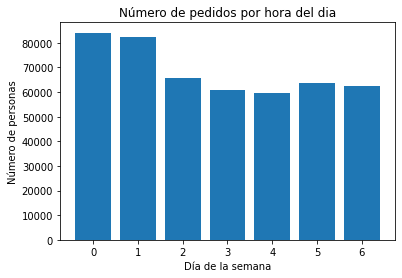

In [39]:
nuevo_df=instacart_orders[["user_id","order_dow"]]
conteo_por_dia = nuevo_df["order_dow"].value_counts().reset_index()


plt.bar(conteo_por_dia['index'], conteo_por_dia['order_dow'])
plt.xlabel('Día de la semana')
plt.ylabel('Número de personas')
plt.title('Número de pedidos por hora del dia')
plt.show()

Escribe aquí tus conclusiones. Se pued ever que el domingo y el lunes hay mas numero de personas haciendo compras

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

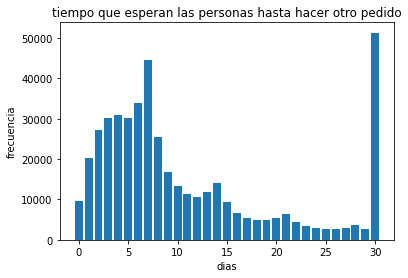

In [40]:
nuevo_df=instacart_orders["days_since_prior_order"]
conteo_tiempo=nuevo_df.value_counts().reset_index()
plt.bar(conteo_tiempo["index"],conteo_tiempo["days_since_prior_order"])


plt.xlabel('dias')
plt.ylabel('frecuencia')
plt.title('tiempo que esperan las personas hasta hacer otro pedido')


plt.show()



Escribe aquí tus conclusiones. Suelen pasar 30 dias desde que el cliente hace un pedido desde su primera orden

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Bien.
</div>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:


miercoles=instacart_orders[instacart_orders['order_dow']==3]
conteo_miercoles= miercoles["order_hour_of_day"].value_counts().reset_index()
conteo_miercoles.columns= ["hora","conteo_miercoles"]


In [42]:
sabado=instacart_orders[instacart_orders['order_dow']==6]
conteo_sabado= sabado["order_hour_of_day"].value_counts().reset_index()
conteo_sabado.columns= ["hora","conteo_sabado"]


In [43]:
resultados_combinados = pd.merge(conteo_miercoles, conteo_sabado, on='hora', how='outer')
print(resultados_combinados)

    hora  conteo_miercoles  conteo_sabado
0     15              5163           5188
1     10              5026           4919
2     11              5004           5116
3     16              4976           5029
4     14              4774           5375
5     12              4688           5132
6     13              4674           5323
7      9              4490           4311
8     17              4175           4295
9     18              3463           3338
10     8              3125           3246
11    19              2652           2610
12    20              1917           1847
13     7              1732           1619
14    21              1450           1473
15    22              1154           1185
16    23               718            893
17     6               643            451
18     0               373            464
19     1               215            254
20     5               170            161
21     4               108            118
22     2               106        

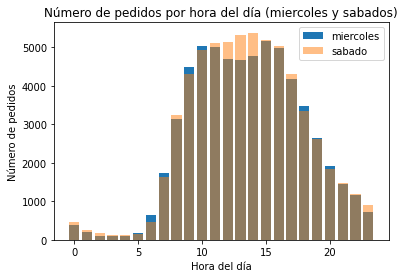

In [44]:
plt.bar(resultados_combinados['hora'], resultados_combinados['conteo_miercoles'], label='miercoles')
plt.bar(resultados_combinados['hora'], resultados_combinados['conteo_sabado'], label='sabado',alpha=0.5)
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por hora del día (miercoles y sabados)')
plt.legend()

# Muestra el gráfico
plt.show()

Escribe aquí tus conclusiones. Los pedidos del dia miercoles y sabado son bastnate similares


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

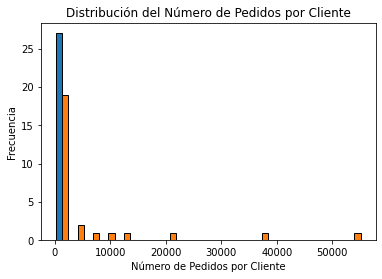

In [45]:
nuevo_df = instacart_orders.groupby('user_id')['order_id'].nunique()
pedidos_por_cliente = nuevo_df.value_counts().reset_index()

plt.hist(pedidos_por_cliente, bins=20, edgecolor='k')  # Ajusta el número de bins según tu preferencia.
plt.xlabel('Número de Pedidos por Cliente')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.show()


Escribe aquí tus conclusiones. Se observa que los pedidos no mayores a 5 son muy superiores en cantidad que a otras cantidades

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
nuevo_df=order_products[["order_id","product_id"]]
conteo_productos=nuevo_df["product_id"].value_counts().reset_index()
conteo_productos = conteo_productos.sort_values(by='product_id', ascending=False)
conteo_productos.columns = ['product_id', 'conteo']

mas_populares = conteo_productos.merge(products, on='product_id', how='left')

# Mostrar los resultados
print(mas_populares.head(20))


    product_id  conteo              product_name  aisle_id  department_id
0        24852   66050                    BANANA        24              4
1        13176   53297    BAG OF ORGANIC BANANAS        24              4
2        21137   37039      ORGANIC STRAWBERRIES        24              4
3        21903   33971      ORGANIC BABY SPINACH       123              4
4        47209   29773      ORGANIC HASS AVOCADO        24              4
5        47766   24689           ORGANIC AVOCADO        24              4
6        47626   21495               LARGE LEMON        24              4
7        16797   20018              STRAWBERRIES        24              4
8        26209   19690                     LIMES        24              4
9        27845   19600        ORGANIC WHOLE MILK        84             16
10       27966   19197       ORGANIC RASPBERRIES       123              4
11       22935   15898      ORGANIC YELLOW ONION        83              4
12       24964   15292            ORGA

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien.
</div>


Escribe aquí tus conclusiones. Se puede observar que la mayor cantidad de los productos mas populares provienen del pasillo de frutas frescas

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [47]:

nuevo_df=order_products[["order_id","product_id"]]
conteo_de_pedidos=order_products.groupby("order_id")["product_id"].count()
conteo_items_por_orden = conteo_de_pedidos.value_counts().reset_index()
conteo_items_por_orden.columns = ["Cantidad de Ítems", "Número de Compras"]

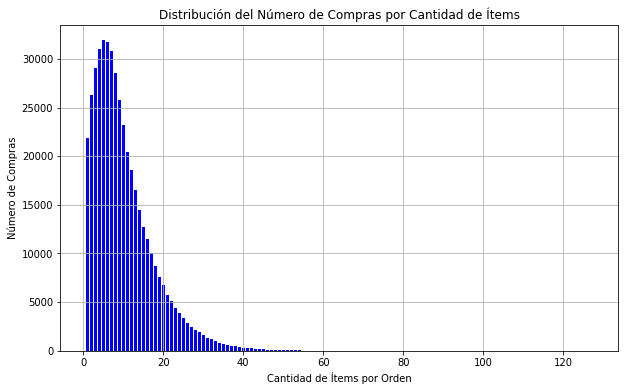

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(conteo_items_por_orden["Cantidad de Ítems"], conteo_items_por_orden["Número de Compras"], color='blue')
plt.xlabel('Cantidad de Ítems por Orden')
plt.ylabel('Número de Compras')
plt.title('Distribución del Número de Compras por Cantidad de Ítems')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones. En el grafico de dispersion vemos que la distribucion del numero de articulos en un pedido es mayor dentro de los rangos de 0 a 20 , que es donde se ve mayor densidad de puntos

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Un gráfico de barras que nos muestre la distribución del número de compras por número de ítems podría permitirnos visualizar mejor el comportamiento de lo solicitado.
</div>
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
lo hice asi porque si utilizo histograma o grafico de barras mi kernel muere

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
#order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
#'order_id': número de ID que identifica de manera única cada pedido.
#'product_id': número ID que identifica de manera única cada producto.
#'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
#'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

In [50]:
nuevo_df = order_products[["product_id","reordered"]]
conteo_de_reordenes = nuevo_df.groupby("product_id").count().reset_index()
conteo_de_reordenes_ordenado = conteo_de_reordenes.sort_values(by="reordered",ascending = False)
top_20_repedidos = conteo_de_reordenes_ordenado.merge(products, on='product_id', how='left')
print(top_20_repedidos.head(20))

    product_id  reordered              product_name  aisle_id  department_id
0        24852      66050                    BANANA        24              4
1        13176      53297    BAG OF ORGANIC BANANAS        24              4
2        21137      37039      ORGANIC STRAWBERRIES        24              4
3        21903      33971      ORGANIC BABY SPINACH       123              4
4        47209      29773      ORGANIC HASS AVOCADO        24              4
5        47766      24689           ORGANIC AVOCADO        24              4
6        47626      21495               LARGE LEMON        24              4
7        16797      20018              STRAWBERRIES        24              4
8        26209      19690                     LIMES        24              4
9        27845      19600        ORGANIC WHOLE MILK        84             16
10       27966      19197       ORGANIC RASPBERRIES       123              4
11       22935      15898      ORGANIC YELLOW ONION        83              4

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


Escribe aquí tus conclusiones. Existe una relacion entre los 20 articulos mas populares y los 20 articulos que se vuelven a comprar con mayor frecuencia

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
#veces que se pide un producto
producto_pedido=order_products.groupby("product_id")["order_id"].count()
print(producto_pedido)

product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64


In [52]:
#proporcion de un producto que se vuelve a pedir
conteo_repedido = order_products.groupby("product_id")["reordered"].sum()
print(conteo_repedido)

product_id
1        158
2          0
3         31
4         25
7          1
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: reordered, Length: 45573, dtype: int64


In [53]:
proporcion_reordered = conteo_repedido / producto_pedido
print(proporcion_reordered)

product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Length: 45573, dtype: float64


Escribe aquí tus conclusiones. primero saco la cantidad de total que se pide un producto y despues las veces que se reordeno para dividir las veces que se reordeno entre la cantidad total de veces que se pidio para encontrar la proporcion en la que se reordena cada producto

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [54]:
#unir instacart y order_products
reordered_por_user = instacart_orders.merge(order_products, on='order_id', how='left')
total_reordered = reordered_por_user.groupby("user_id")["reordered"].sum().reset_index()
total_ordenes = reordered_por_user.groupby("user_id")["product_id"].count().reset_index()
proporcion_reordered_user=total_reordered["reordered"]/total_ordenes["product_id"]
print(proporcion_reordered_user)

0         0.038462
1         0.000000
2         0.666667
3         0.000000
4         0.928571
            ...   
157432    0.222222
157433    0.714286
157434    0.891304
157435    0.696000
157436    0.320000
Length: 157437, dtype: float64


Escribe aquí tus conclusiones. para encontrar la proporcion de reordered por user_id primero halle el total de reordered por user_id y lo dividi entre el total de ordenes por user_id

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [55]:
#order_products.csv: cada fila corresponde a un artículo pedido en un pedido.
#'order_id': número de ID que identifica de manera única cada pedido.
#'product_id': número ID que identifica de manera única cada producto.
#'add_to_cart_order': el orden secuencial en el que se añadió cada artículo en el carrito.
#'reordered': 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

In [56]:
#articulos mas vendidos y add_to_cart_order=1
filtro= order_products[order_products["add_to_cart_order"]==1]
mas_vendidos=filtro["product_id"].value_counts().sort_values( ascending=False).head(20).reset_index().rename(columns={"index":"product_id","product_id":"conteo"})

mas_vendidos


,product_id,conteo
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>


Escribe aquí tus conclusiones. En esta seccion lo que hicimos fue primero ver la distribucion de cuantas ordenes se hacen en un pedido Con el dataframe "order_products" consegui los 20 articulos que las personas ponen primero en sus carritos que son identificados por su product_id

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Yair. Nos quedan algunos elementos pendientes por resolver tanto de forma como de fondo para poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>


<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Yair. Nos queda un solo elemento pendiente por resolver. He dejado un comentario adicional para ello.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>